Include Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Loading Training dataset

In [2]:
data = pd.read_csv('/content/Prodigy_DS_02.csv')

Check for missing values

In [3]:
missing_values = data.isnull().sum()
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Fill missing values

In [4]:
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

Convert categorical variables using one-hot encoding

In [5]:
data = pd.get_dummies(data, columns=['Sex', 'Embarked'])

Drop columns that won't be useful for analysis, but only if they exist

In [6]:
for col in ['Name', 'Ticket', 'Cabin']:
    if col in data.columns:
        data.drop(col, axis=1, inplace=True)

#Exploratory Data Analysis (EDA)

In [7]:
print(data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


 Histogram of 'Age'

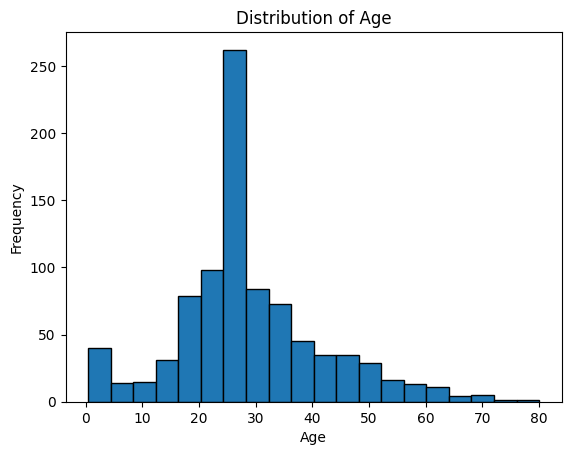

In [8]:
plt.hist(data['Age'], bins=20, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

Correlation matrix

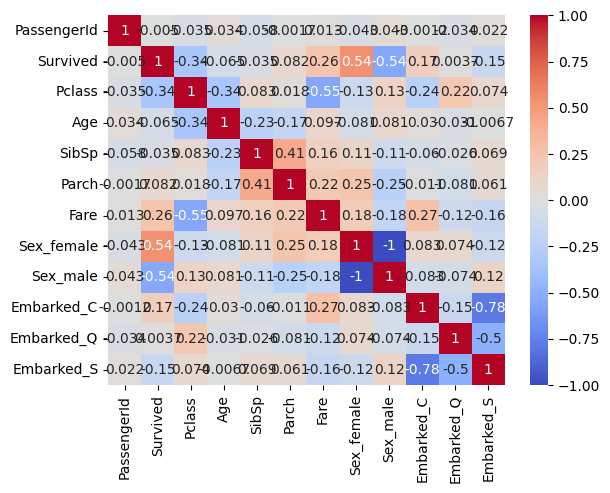

In [9]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Survival rate by gender

In [10]:
survival_rate_by_gender = data.groupby('Sex_female')['Survived'].mean()
print(survival_rate_by_gender)

Sex_female
False    0.188908
True     0.742038
Name: Survived, dtype: float64


Survival rate by class

In [11]:
survival_rate_by_class = data.groupby('Pclass')['Survived'].mean()
print(survival_rate_by_class)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


Pair plot to visualize relationships

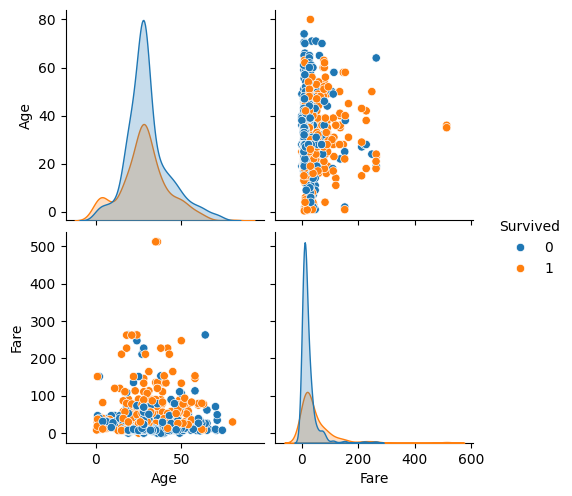

In [12]:
sns.pairplot(data[['Age', 'Fare', 'Survived']], hue='Survived')
plt.show()

Scatter plot for 'Age' vs 'Fare'

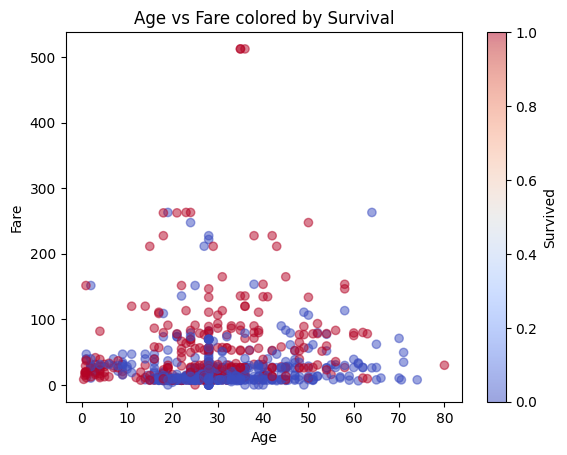

In [13]:
plt.scatter(data['Age'], data['Fare'], c=data['Survived'], cmap='coolwarm', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare colored by Survival')
plt.colorbar(label='Survived')
plt.show()